**Instituto de Informática - UFG**

Disciplina: Inteligência Artificial

Prof. Cedric Luiz de Carvalho


Grupo (Gabriel Olímpio Rocha Leão, Geovanny Magalhães Novais)

---


Analista de dados: Gabriel Olímpio Rocha Leão

---

Engenheiro(a) do conhecimento: Geovanny Magalhães Novais

---


#Máquinas de Vetores de Suporte 





Utilizando a base de dados [Breast Cancer Wisconsin (Prognostic) Data Set]( http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Prognostic%29]), para verificar estados de pacientes acometidos com algum tipo de tumor, após processamento prévio feito na etapa de análise de dados, obtivemos dois novos datasets que serão explorados agora: 


* Montando o drive para acessar a database 


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


* Importando a biblioteca pandas

In [2]:
import pandas as pd

* Criando o dataframe db1, com balanceamento 67 % de câncer benigno e 33 % de câncer maligno

In [3]:
db1 = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Trabalho5/db1.csv')

* Criando o dataframe db2, com balanceamento 50 % de câncer benigno e 50 % de câncer maligno

In [4]:
db2 = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Trabalho5/db2.csv')

* Exibindo valores de exemplo em ambas as bases

In [5]:
db1.head()

,Unnamed: 0,espessuraDoAglomerado,uniformidadeDoTamanhoDaCelula,uniformidadeDoFormatoDaCelula,adesaoMarginal,tamanhoDaCelulaEpitelialUnica,nucleosNus,cromatinaSuave,normalNucleoni,mitoses,classeDoTumor
0,0,4,1,2,1,2,1,2,1,1,2
1,1,4,1,2,1,2,1,2,1,1,2
2,2,4,1,2,1,2,1,2,1,1,2
3,3,5,1,1,6,3,1,2,1,1,2
4,4,5,1,1,1,2,1,1,1,1,2


In [6]:
db2.head()

,Unnamed: 0,espessuraDoAglomerado,uniformidadeDoTamanhoDaCelula,uniformidadeDoFormatoDaCelula,adesaoMarginal,tamanhoDaCelulaEpitelialUnica,nucleosNus,cromatinaSuave,normalNucleoni,mitoses,classeDoTumor
0,0,4,1,2,1,2,1,2,1,1,2
1,1,4,1,2,1,2,1,2,1,1,2
2,2,4,1,2,1,2,1,2,1,1,2
3,3,5,1,1,6,3,1,2,1,1,2
4,4,5,1,1,1,2,1,1,1,1,2


* Visto a falta de necessidade de uma coluna de índices, removeremos elas de ambas as bases

In [7]:
db1.pop("Unnamed: 0")

0        0
1        1
2        2
3        3
4        4
      ... 
595    595
596    596
597    597
598    598
599    599
Name: Unnamed: 0, Length: 600, dtype: int64

In [8]:
db2.pop("Unnamed: 0")

0        0
1        1
2        2
3        3
4        4
      ... 
395    395
396    396
397    397
398    398
399    399
Name: Unnamed: 0, Length: 400, dtype: int64

* Importando a biblioteca sklearn no módulo de treino, teste e divisão

In [9]:
from sklearn.model_selection import train_test_split

* Importando a biblioteca sklearn com o módulo svm



In [10]:
from sklearn import svm

* Importando a biblioteca numpy e a apelidando de 'np'






In [11]:
import numpy as np

* Importando a biblioteca sklearn com o módulo de matriz de confusão
* Importando a biblioteca seaborn e a apelidando de 'sns'

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

* Definindo a função que imprime as matrizes de confusão

In [37]:
def plot_confusion_matrix(cm):
    ax = sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    ax.set(ylabel='Valor verdadeiro')
    ax.set(xlabel='Valor previsto')
    labels = ['Verdadeiro Negativo', 
              'Falso Positivo', 
              'Falso Negativo', 
              'Verdadeiro Positivo']
    ax.set(yticklabels=['Negativo','Positivo'])
    ax.set(xticklabels=['Negativo','Positivo'])

    count = 0
    bacc = []
    for idx, text in enumerate(ax.texts):
        label = int(text.get_text())
        count += label
        bacc.append(label)

    acc1 = bacc[0] / ( bacc[0] + bacc[2] )
    acc2 = bacc[3] / ( bacc[1] + bacc[3] ) 
    balanced_accuracy = ( acc1 + acc2 ) / 2
    for idx,text in enumerate(ax.texts):
        square = text.get_text()
        percent = int(text.get_text()) / count
        percent = "{0:.0%}".format(percent)
        box_text = "{0}: \n \n {1} \n \n {2}".format(labels[idx], square, percent)
        text.set_text(box_text)
    ax.set_title('Matriz de Confusão')

# Testes com a base de dados 1, onde temos 65% benigno

* Criando a variável x1 com o dataframe db1, sem a coluna alvo
* Criando a variável y1 com o dataframe db1, somente com a coluna alvo

In [40]:
x1 = db1.drop('classeDoTumor', axis=1)
y1 = db1['classeDoTumor']

* Criando valores aleatórios para os testes
* Dividindo a base de dados em zona de teste (30%) e zona e treino (70%)

In [41]:
rng = np.random.RandomState(0)
xDeTreino, xDeTeste, yDeTreino, yDeTeste = train_test_split(x1, y1, test_size = 0.3, random_state = rng)

* Criando classificador SVM com C com valor 1

In [42]:
clf = svm.SVC(C=1.0)

* Treinando o classificador

In [43]:
clf.fit(xDeTreino, yDeTreino)

SVC()

* Observando o que foi predito

In [44]:
yPred = clf.predict(xDeTeste)
print (yPred)

[4 2 2 4 2 2 4 4 4 2 2 4 2 2 2 4 4 2 2 2 4 4 2 2 4 2 2 4 4 4 2 4 2 2 2 4 2
 2 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2 4 4 4 2 2 2 4 4 2 4 4 2 2 2 2 4
 2 2 2 4 4 4 4 2 2 4 2 2 2 2 2 2 4 4 4 2 4 2 4 2 2 2 2 2 4 2 2 2 4 4 4 4 2
 2 2 2 4 2 2 4 2 4 2 4 2 2 2 2 4 4 4 4 2 2 4 2 2 4 2 2 2 4 2 4 2 2 4 4 2 2
 4 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 4 4 2 2 4 4 2 4 2 2 4 2 2 4 4 2]


* Observando o que havia em y

In [45]:
yDeTeste

434    4
122    2
224    2
479    4
205    2
      ..
249    2
357    2
455    4
493    4
134    2
Name: classeDoTumor, Length: 180, dtype: int64

* Observando o nível de acerto do modelo

In [46]:
clf.score(xDeTeste, yDeTeste)

0.9777777777777777

* Instanciando a matriz de confusão e imprimindo-a

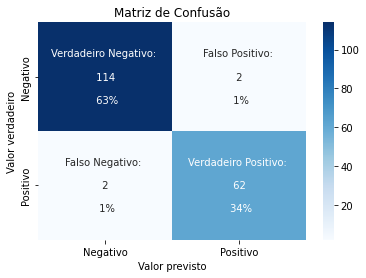

In [47]:
cm = confusion_matrix(yDeTeste, yPred)
plot_confusion_matrix(cm)

# Testes com a base de dados 2, onde temos 50% benigno

* Criando a variável x2 com o dataframe db2, sem a coluna alvo
* Criando a variável y2 com o dataframe db2, somente com a coluna alvo

In [29]:
x2 = db2.drop('classeDoTumor', axis=1)
y2 = db2['classeDoTumor']

* Criando valores aleatórios para os testes
* Dividindo a base de dados em zona de teste (30%) e zona e treino (70%)

In [30]:
rng2 = np.random.RandomState(0)
xDeTreino2, xDeTeste2, yDeTreino2, yDeTeste2 = train_test_split(x2, y2, test_size = 0.3, random_state = rng2)

* Criando classificador SVM com C com valor 1

In [31]:
clf2 = svm.SVC(C=1.0)

* Treinando o classificador

In [32]:
clf2.fit(xDeTreino2, yDeTreino2)

SVC()

* Observando o que foi predito

In [33]:
yPred2 = clf2.predict(xDeTeste2)
print(yPred2)

[2 4 4 2 4 2 2 4 2 4 2 2 2 4 2 2 4 2 4 2 4 4 2 4 2 4 2 2 4 2 4 4 4 4 2 2 2
 4 2 4 2 4 2 2 4 2 4 4 2 4 4 2 4 2 4 4 2 2 2 2 2 4 2 4 2 4 2 2 2 2 2 4 2 2
 2 2 4 4 4 4 4 2 2 2 4 4 2 4 4 4 4 4 2 2 2 2 2 4 4 4 4 2 4 2 4 4 2 4 2 4 2
 4 4 2 4 4 4 2 4 4]


* Observando o que existia em y

In [34]:
yDeTeste2

132    2
309    4
341    4
196    2
246    4
      ..
216    4
259    4
49     2
238    4
343    4
Name: classeDoTumor, Length: 120, dtype: int64

* Observando o nível de acerto do modelo

In [35]:
clf.score(xDeTeste2, yDeTeste2)

0.9666666666666667

* Instanciando a matriz de confusão e imprimindo-a

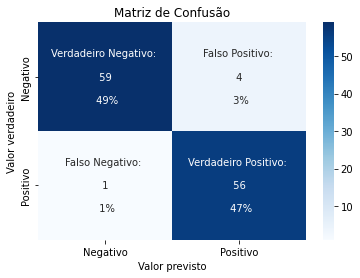

In [38]:
cm = confusion_matrix(yDeTeste2, yPred2)
plot_confusion_matrix(cm)